<a href="https://colab.research.google.com/github/singhsukhendra/A-to-Z-Resources-for-Students/blob/master/MovieGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#%matplotlib inline
import os


In [0]:
train = pd.read_csv("/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/train.csv") 


In [13]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [15]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg', target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
train_image = []

y = np.array(train.drop(['Id', 'Genre'], axis=1))
y = y[:7254]
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)



100%|██████████| 7254/7254 [48:48<00:00,  2.92it/s]


(7254, 25)


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#%matplotlib inline
import os
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
print(model.summary())




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 43, 43, 64)       




Train on 6528 samples, validate on 726 samples
Epoch 1/50





6528/6528 [==============================] - 15s 2ms/step - loss: 0.3454 - acc: 0.8684 - val_loss: 0.2488 - val_acc: 0.9061
Epoch 2/50
6528/6528 [==============================] - 6s 962us/step - loss: 0.2711 - acc: 0.9049 - val_loss: 0.2519 - val_acc: 0.9067
Epoch 3/50
6528/6528 [==============================] - 6s 958us/step - loss: 0.2612 - acc: 0.9060 - val_loss: 0.2428 - val_acc: 0.9073
Epoch 4/50
6528/6528 [==============================] - 6s 959us/step - loss: 0.2554 - acc: 0.9078 - val_loss: 0.2406 - val_acc: 0.9060
Epoch 5/50
6528/6528 [==============================] - 6s 973us/step - loss: 0.2513 - acc: 0.9075 - val_loss: 0.2379 - val_acc: 0.9092
Epoch 6/50
6528/6528 [==============================] - 6s 967us/step - loss: 0.2478 - acc: 0.9082 - val_loss: 0.2371 - val_acc: 0.9105
Epoch 7/50
6528/6528 [==============================] - 6s 969us/step - loss: 0.2461 - acc: 0.9091 - val_loss: 0.2366 - val_acc: 0

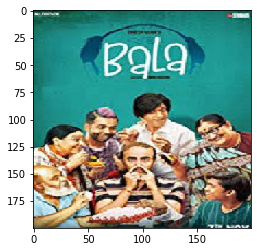

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnew.h5")
print("Saved model to disk")


# In[ ]:

img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/bala.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.621)
Action (0.289)
Thriller (0.235)


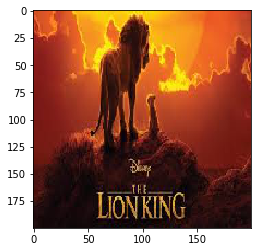

In [20]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/lion king.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

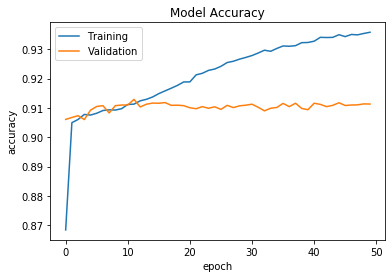

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

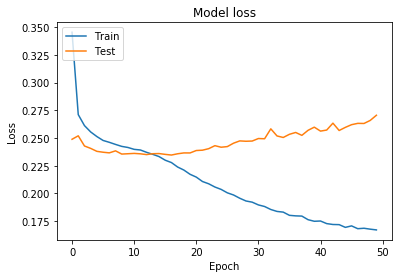

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
from keras.models import load_model
from keras.models import model_from_json
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnew.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import load_model
from keras.models import model_from_json
import json

model.load_weights('modelnew.h5')

Drama (0.58)
Comedy (0.562)
Romance (0.324)


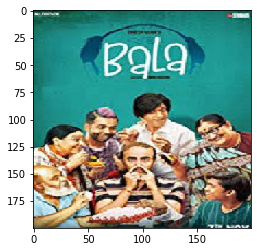

In [25]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/bala.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.997)
Comedy (0.996)
Romance (0.958)


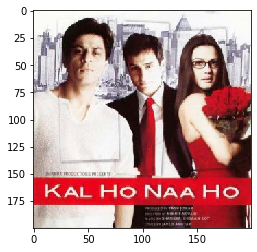

In [26]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/kalhonaho.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.374)
Comedy (0.264)
Action (0.242)


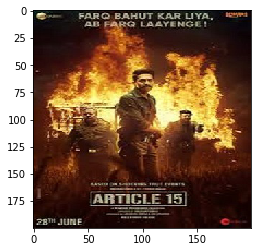

In [27]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/article15.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Comedy (1.0)
Romance (0.442)
Drama (0.201)


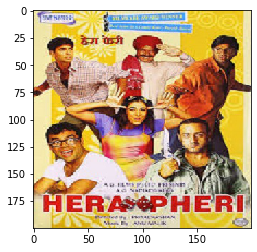

In [28]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/herapheri.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Comedy (0.977)
Drama (0.814)
Romance (0.644)


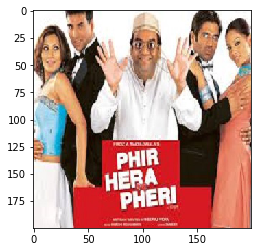

In [29]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/phirherapheri.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.666)
Comedy (0.513)
Crime (0.298)


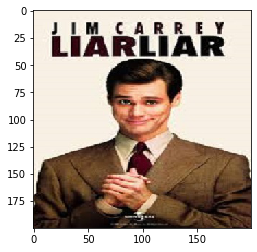

In [30]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/liarliar.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)